In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from semantic_segmentation_tile import *
from classic_segmentation import ImageDivider

# Segmentation

In [ ]:
img_path = Path("dataset_segmentation/images/Apricot1.png")

use 1.33 scale factor for camera imgs

In [ ]:
predictor = SegmentationTilePredictor("models", "segmentation_resnet18_10_sept_2020.pkl", (233, 205), scale=2)

In [ ]:
# pred_mask, img = predictor.predict_mask("Image0000.tiff")

In [ ]:
pred_mask, img = predictor.predict_mask("dataset_segmentation/images/Apricot1.png")

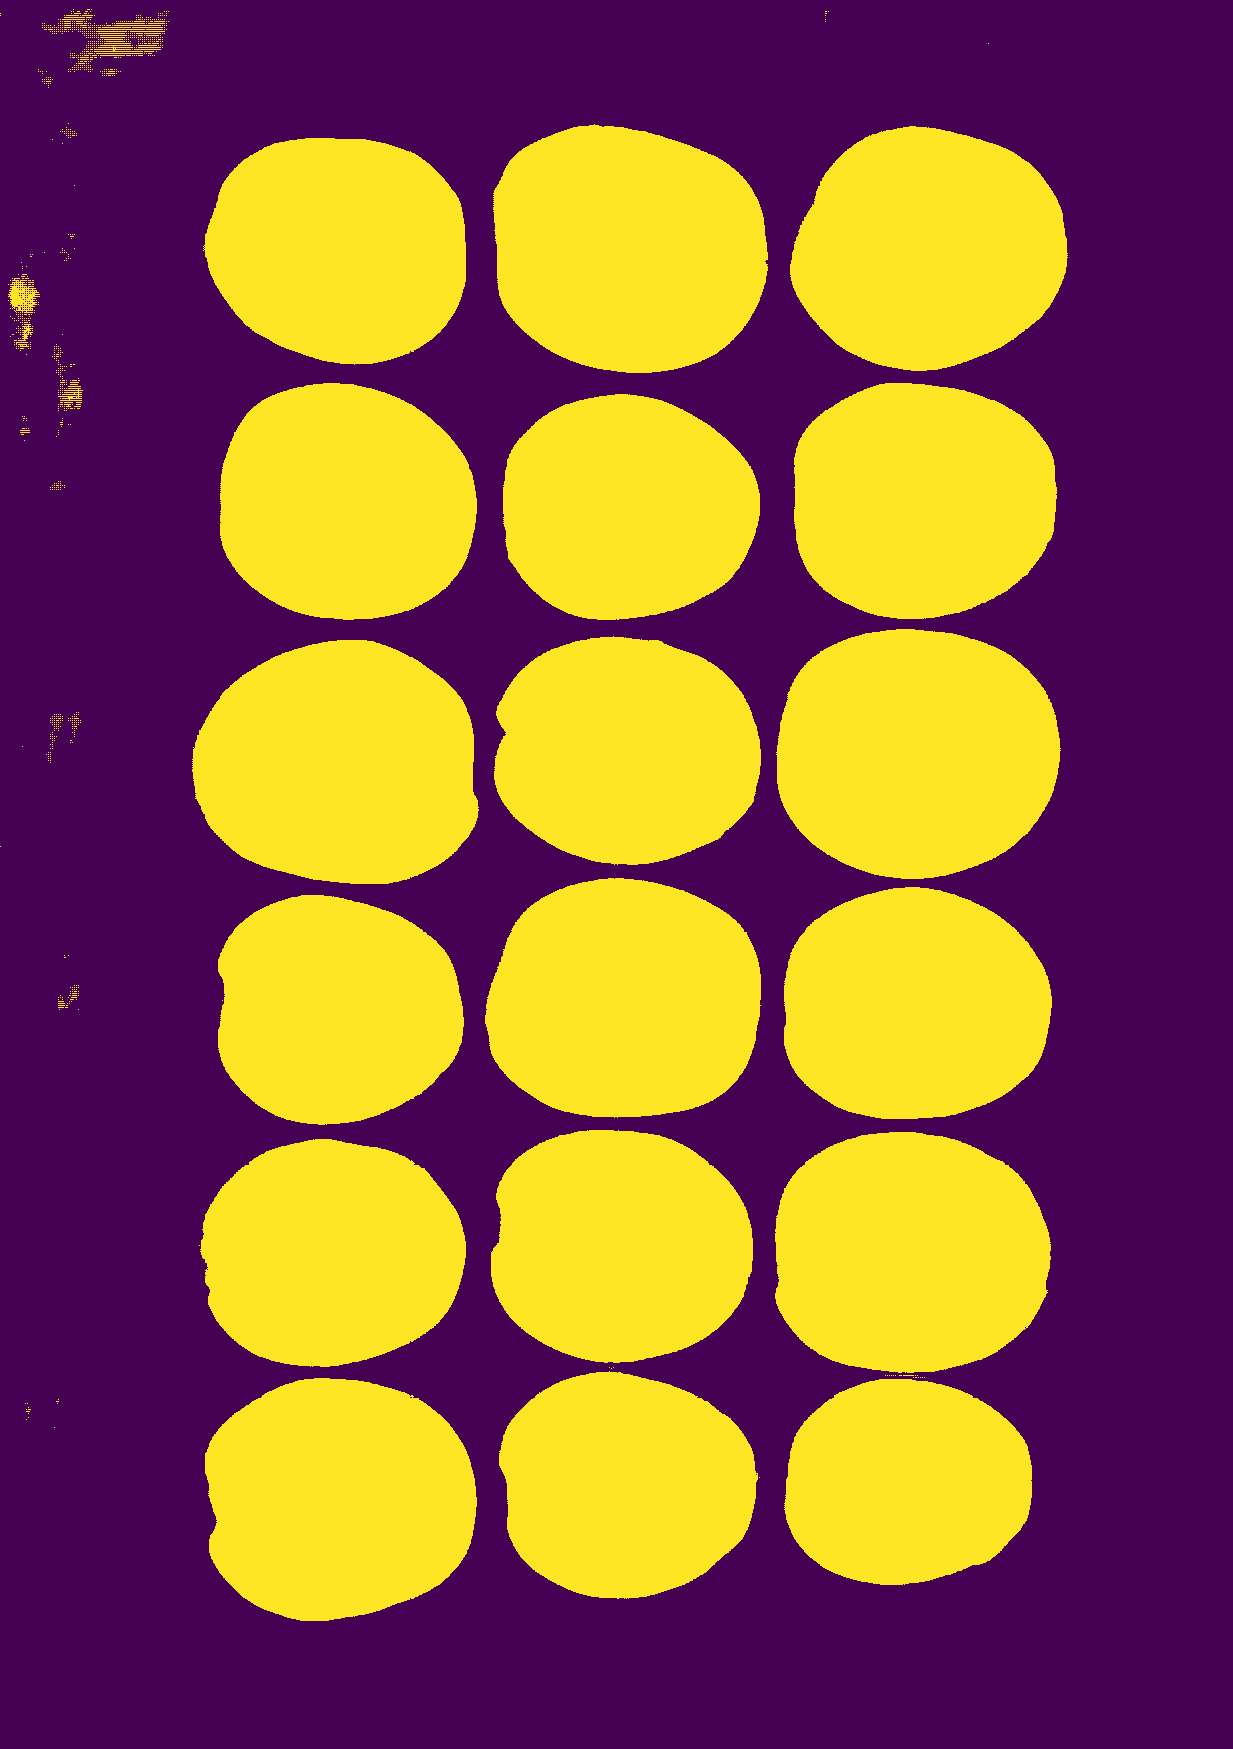

In [ ]:
pred_mask

# Classification

In [ ]:
#load trained model
learn_class = load_learner("dataset_classification/models", "Classification_resnet18_10_sept_2020.pkl")

In [ ]:
imgs = ImageDivider.from_fastai(img, pred_mask, clean_mask=True).images()

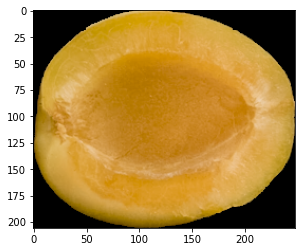

In [ ]:
plt.imshow(imgs[0])

In [ ]:
preds = [learn_class.predict(Image(pil2tensor(img, np.float32)))[0] for img in imgs]

In [ ]:
str(max(set(preds), key=preds.count))

'Mushroom'

In [ ]:
preds

[Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(16),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(9),
 Category tensor(16),
 Category tensor(10)]

In [ ]:
type(preds[0])

fastai.core.Category

In [ ]:
learn_class

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: dataset_classification/models;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: dataset_classification/models;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

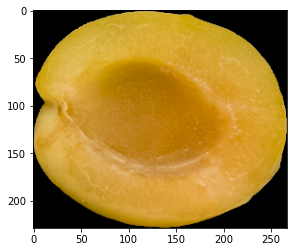

In [ ]:
plt.imshow(imgs[10])

In [ ]:
preds.count?

Signature: preds.count(value, /)
Docstring: Return number of occurrences of value.
Type:      builtin_function_or_method


In [ ]:
# split in individual images

In [ ]:
# get classification results